## EDA: Analysis of Trending Youtube Video Statistic

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import glob
import matplotlib.pyplot as plt
%matplotlib inline

# all_videos1 dataframe has all rows and columns with all data cleaned up
# final_videos is grouped by country with the row of video id that get trended in the shortest period of time from publish date

all_videos1 = pd.read_csv('../GA_Project4_Draft/all_videos1.csv')
final_videos = pd.read_csv('../GA_Project4_Draft/final_videos.csv')

#### 1. How many likes, dislikes, views and comments get by different countries?

In [ ]:
# For likes, views and comment_counts, all countries share the same ratio in all categories.
# DE gives relatively more dislikes compared to its likes count.
# Likes, views and comment_count are strongly correlated to each other while correlation with dislikes is comparatively lower.

# GB and US do not give high counts in likes, dislikes, views and comment_count when the video first get trended.
# But as videos get trended, GB and US contribute more in increasing likes, dislikes, views and comment_count.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000474BC06D30>,
      dtype=object)

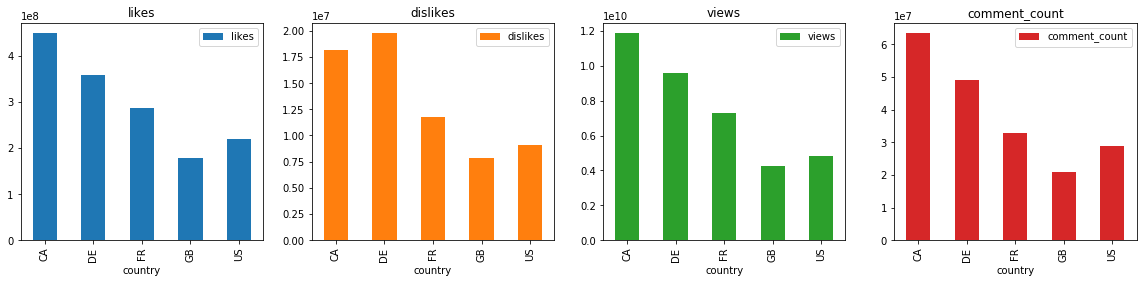

In [74]:
final_videos1 = final_videos.groupby('country')['likes','dislikes','views','comment_count'].sum()
final_videos1.plot(kind='bar',subplots=True,layout=(1,4),figsize=(20,4))

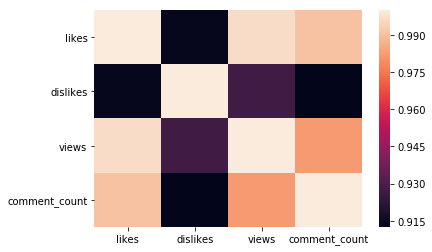

In [62]:
sns.heatmap(final_videos1.corr())

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000474037EB38>,
      dtype=object)

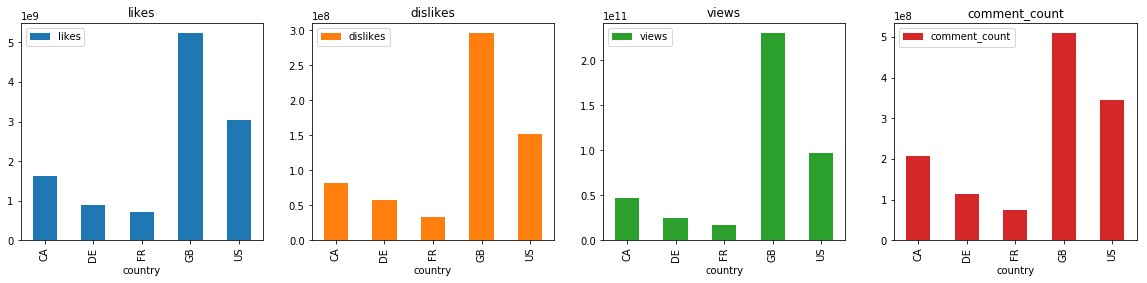

In [75]:
all_videos2 = all_videos1.groupby('country')['likes','dislikes','views','comment_count'].sum()
all_videos2.plot(kind='bar',subplots=True,layout=(1,4),figsize=(20,4))

#### 2. How many times usually a video can trend in different countries?

In [ ]:
# By country,does higher video trend count give lower video count on trending list?

In [ ]:
final_videos6 = final_videos.groupby('country')['video_id'].value_counts()
final_videos7 = final_videos.groupby('country')['trend_count'].sum()
final_videos6.append(final_videos7)
final_videos6.plot(kind='bar')

#### 3. Does publish hour affect how many times videos get trended? Varies in different countries?

In [ ]:
# Overall data shows that publish_hour at 1600 gives highest trend_count.
# publish_hour from 2300 to 1100 generally has lower trend_count.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000047580261D0>,
      dtype=object)

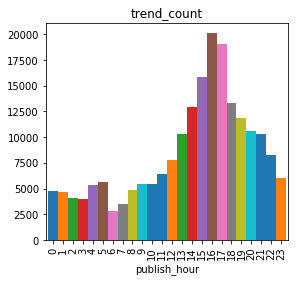

In [154]:
final_videos2 = final_videos.groupby('publish_hour')['trend_count'].sum()
final_videos2.plot(kind='bar',subplots=True,layout=(1,4),figsize=(20,4),width=1.0)

In [ ]:
final_videos3 = final_videos.groupby('country')
final_videos3.plot(kind='bar',x='publish_hour', y='trend_count',subplots=True,layout=(1,4),figsize=(20,4),width=1.0)

#### 4. Does publish hour affect how fast videos get trended? Varies in different countries

In [ ]:
# No particular trending observed between publish_hour and trend_publish diff.

country
CA    [[AxesSubplot(0.125,0.125;0.168478x0.755), Axe...
DE    [[AxesSubplot(0.125,0.125;0.168478x0.755), Axe...
FR    [[AxesSubplot(0.125,0.125;0.168478x0.755), Axe...
GB    [[AxesSubplot(0.125,0.125;0.168478x0.755), Axe...
US    [[AxesSubplot(0.125,0.125;0.168478x0.755), Axe...
dtype: object

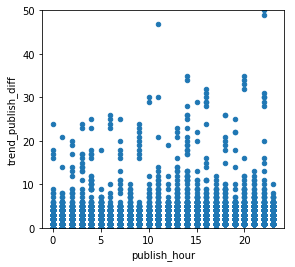

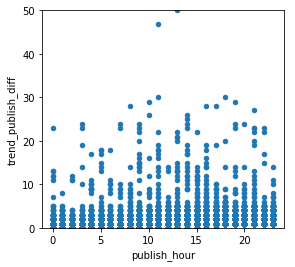

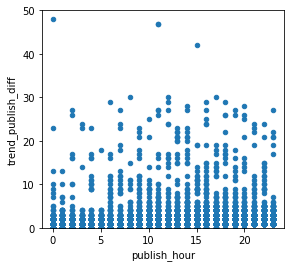

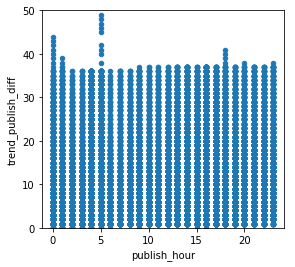

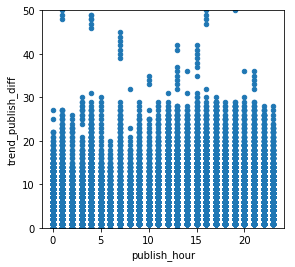

In [29]:
all_videos5 = all_videos1.groupby('country')
all_videos5.plot(kind='scatter',x='publish_hour', y='trend_publish_diff',subplots=True,layout=(1,4),figsize=(20,4),ylim=(0,50))

#### 5. Do videos that disable ratings and comments functions have lower possibility of getting trended?

In [ ]:
# Only 2% of comments_disabled videos get trended.
# Only 1% of ratings_disabled videos get trended.

In [51]:
final_videos4 = final_videos.groupby('comments_disabled')['trend_count'].sum()
final_videos4

comments_disabled
False    199512
True       3796
Name: trend_count, dtype: int64

In [50]:
final_videos5 = final_videos.groupby('ratings_disabled')['trend_count'].sum()
final_videos5

ratings_disabled
False    201279
True       2029
Name: trend_count, dtype: int64

#### 6. Does the number of tags affect likes, dislikes, views, comments, duration of getting trended and also trend count?

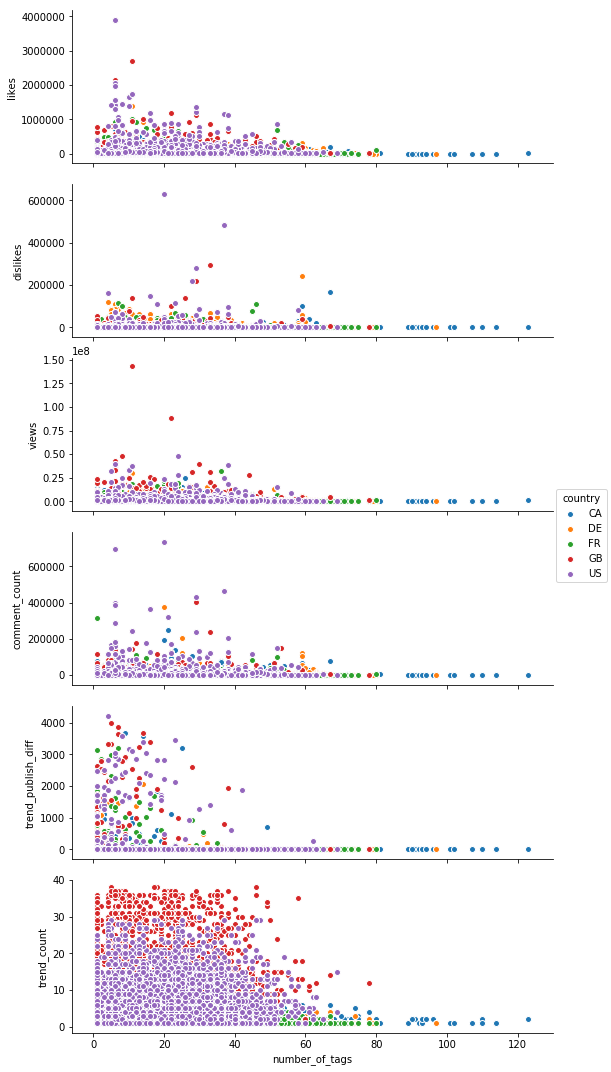

In [149]:
feature_cols =['likes','dislikes','views','comment_count','trend_publish_diff','trend_count']
sns.pairplot(final_videos, kind='scatter', x_vars='number_of_tags', y_vars=feature_cols, hue='country',aspect = 3);

### Heatmap (Overall and by country)

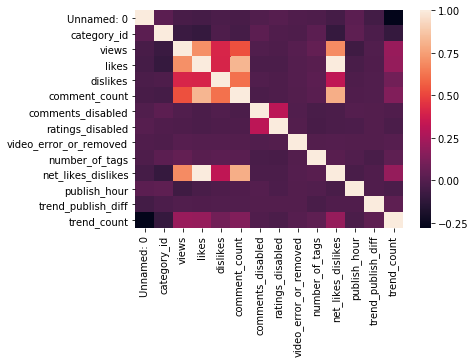

In [3]:
sns.heatmap(final_videos.corr())

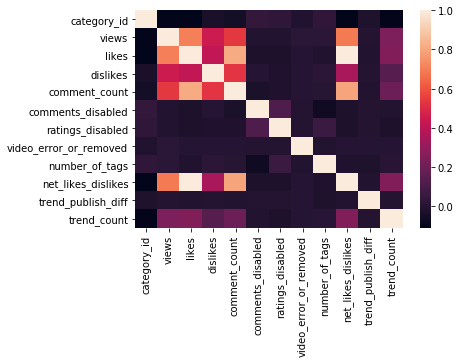

In [23]:
sns.heatmap(j['CA'].corr())

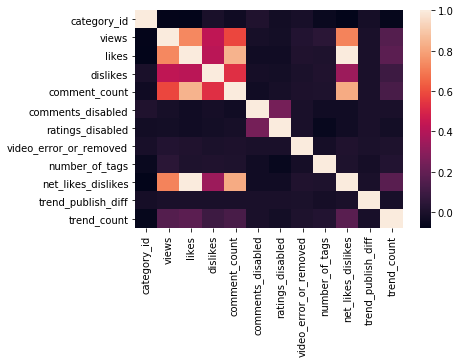

In [25]:
sns.heatmap(j['DE'].corr())

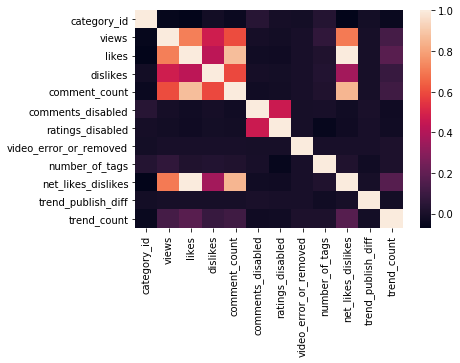

In [26]:
sns.heatmap(j['FR'].corr())

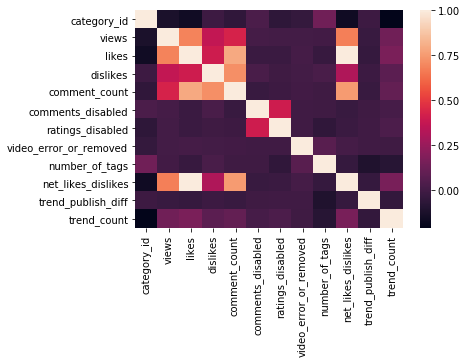

In [27]:
sns.heatmap(j['GB'].corr())

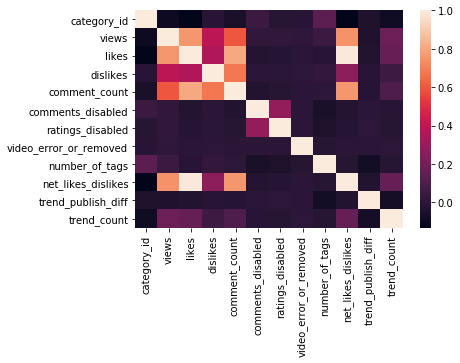

In [28]:
sns.heatmap(j['US'].corr())